In [112]:
# imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import footprint_rectangle
from skimage.filters.rank import mean
from scipy.signal import convolve2d
from scipy.ndimage import convolve
import numpy as np
import time
from skimage.util import random_noise
from scipy.ndimage import generic_filter
from skimage.filters.rank import median
from skimage.filters.rank import maximum, minimum, modal, majority, geometric_mean


# **Filtros lineales suavizantes**

## **Filtro promedio**

Hay en total 34 niveles de intensidad


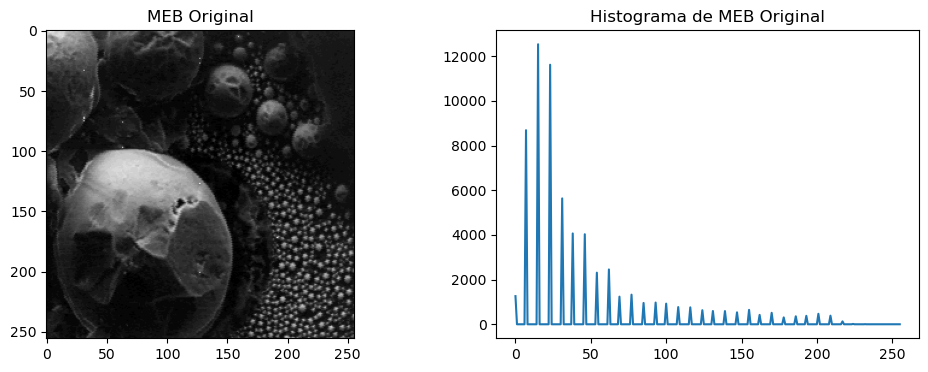

In [88]:
meb = cv2.imread('images/MEB.png', cv2.IMREAD_GRAYSCALE)
meb_hist = cv2.calcHist([meb], [0], None, [256], [0, 256])

niveles = np.count_nonzero(meb_hist)
print(f"Hay en total {niveles} niveles de intensidad")

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].imshow(meb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('MEB Original')
ax[1].plot(meb_hist)
ax[1].set_title('Histograma de MEB Original')
plt.show()


**Describa su forma: ¿es continuo/discontinuo?, ¿cuántos niveles de gris diferentes tiene?**

La forma del histograma es discontinua, ya que se observan picos en niveles de gris específicos separados por intervalos donde la frecuencia es aproximadamente 0, lo que indica que no todos los valores entre 0 y 255 están presentes en la imagen. Aunque el rango alcanza valores cercanos a 255, la cantidad de niveles de gris utilizados es menor que 256, pues solo ciertos niveles presentan ocurrencias.

**¿cuáles son estos niveles de gris?**

Dentro de la imagen se presentan al rededor de 34 niveles de gris dentro de la imagen.

**¿Cuantos bits tiene la imagen según el histograma**

La imagen presenta al rededor de 256 valores posibles, por lo que esta tiene un total de 8 bits.

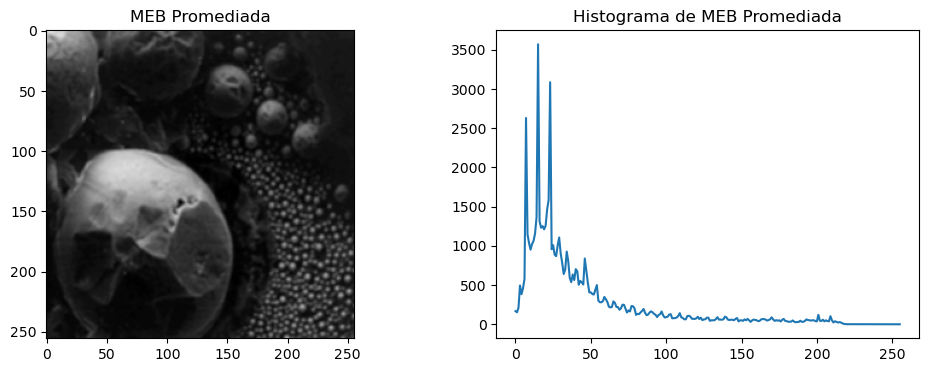

In [89]:
meb_avg = mean(meb, footprint_rectangle((3,3)))
meb_avg_hist = cv2.calcHist([meb_avg], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].imshow(meb_avg, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('MEB Promediada')
ax[1].plot(meb_avg_hist)
ax[1].set_title('Histograma de MEB Promediada')
plt.show()


**¿cómo es la imagen resultado?**

La imagen promediada se ve en grandes razgos de peor calidad dado que esta se encuentra suabizada por el filtro. En esta segunda foto se pierde detalle de luminosidad y calidad en los bordes de los circulos, se observa de forma notoria en los circulitos pequeños que se encuentran en la parte inferior de la imagen, donde en la original estos se ven bien definidos, mientras que para la segunda imagen ya se contemplan como borrosos.

**Histograma Original VS Histograma Promediado**

La diferencia más notoria entre ambos histogramas es la continuidad en la distribución de los niveles de gris. El histograma original presentaba una forma discontinua, con varios niveles cuya frecuencia era 0, generando picos aislados. En cambio, el histograma de la imagen promediada muestra una distribución más continua y uniforme, donde prácticamente no se observan intervalos con frecuencia nula. Esto se debe a que el filtro de promedio suaviza la imagen, redistribuyendo las intensidades y generando nuevos niveles intermedios, lo que produce una transición más gradual entre valores de gris.

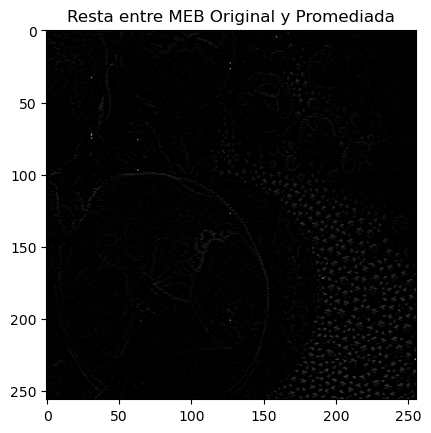

In [90]:
subtraction = cv2.subtract(meb, meb_avg)
plt.imshow(subtraction, cmap='gray', vmin=0, vmax=255)
plt.title('Resta entre MEB Original y Promediada')
plt.show()

**¿en cuáles regiones de la imagen son visibles las diferencias?, ¿por qué?**

Las diferencias se encuentran de forma más visible en el cuarto cuadrante de la imagen (abajo a la izquierda), justo donde se encuentran los circulitos mencionados anteriormente. Esto ocurre porque en esa zona existen cambios bruscos de intensidad y detalles finos que el filtro de promedio tiende a suavizar. Al realizar la resta entre la imagen original y la promediada, estas variaciones locales se resaltan, ya que representan componentes de alta frecuencia (bordes y estructuras pequeñas) que fueron atenuadas durante el suavizado.

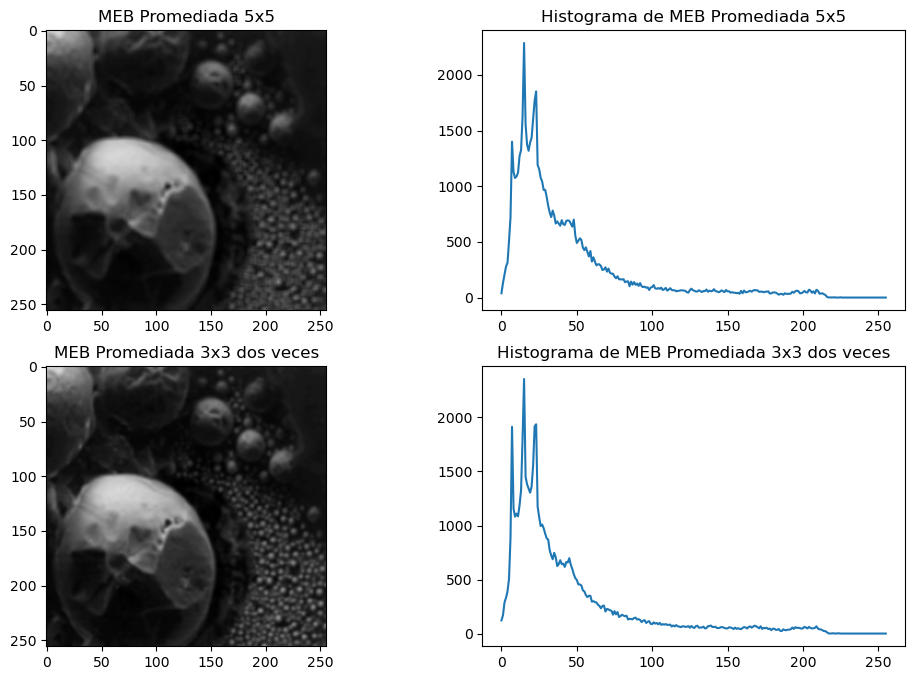

In [91]:
# Promedio con 5x5
meb_avg_5 = mean(meb, footprint_rectangle((5,5)))
meb_avg_5_hist = cv2.calcHist([meb_avg_5], [0], None, [256], [0, 256])

# Promedio con 3x3 aplicado dos veces
meb_avg_3_1 = mean(meb, footprint_rectangle((3,3)))
meb_avg_3_2 = mean(meb_avg_3_1, footprint_rectangle((3,3)))
meb_avg_3_2_hist = cv2.calcHist([meb_avg_3_2], [0], None, [256], [0, 256])

# Visualización de los resultados
fig, ax = plt.subplots(2,2, figsize=(12, 8))

ax[0,0].imshow(meb_avg_5, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('MEB Promediada 5x5')
ax[0,1].plot(meb_avg_5_hist)
ax[0,1].set_title('Histograma de MEB Promediada 5x5')

ax[1,0].imshow(meb_avg_3_2, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('MEB Promediada 3x3 dos veces')
ax[1,1].plot(meb_avg_3_2_hist)
ax[1,1].set_title('Histograma de MEB Promediada 3x3 dos veces')
plt.show()



**¿las dos imágenes obtenidas son idénticas?**

Las dos imágenes obtenidas no son idénticas, aunque visualmente resultan muy similares. A partir de los histogramas se observan pequeñas diferencias en la distribución de intensidades, especialmente en las zonas de bajas intensidades donde se concentran los picos principales. El filtrado 5×5 produce un suavizado más fuerte en una sola operación, mientras que aplicar un filtro 3×3 dos veces genera un efecto acumulativo que no es exactamente equivalente.

**¿por qué?**  

No son idénticas porque un promedio 5×5 en una sola operación no es matemáticamente equivalente a aplicar un promedio 3×3 dos veces. Aunque ambos generan suavizado, el kernel efectivo que resulta de aplicar 3×3 dos veces es diferente al kernel uniforme 5×5.

**¿cuál de los dos tratamientos suprime mejor los cambios de nivel de gris de la imagen?**

El filtro promedio 5×5 suprime mejor los cambios de nivel de gris que el filtro 3×3 aplicado dos veces.
Esto se debe a que el kernel 5×5 considera una vecindad mayor en una sola operación, integrando más píxeles en el cálculo del promedio y, por tanto, produciendo un suavizado más fuerte y uniforme. Como resultado, las variaciones locales de intensidad (ruido o pequeños cambios de gris) se atenúan con mayor eficacia.

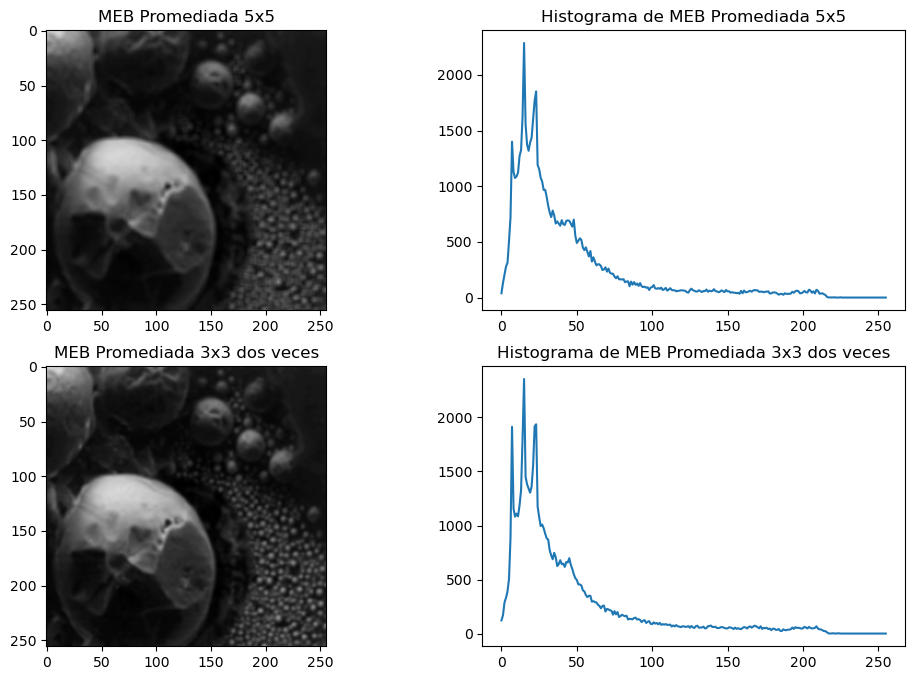

In [92]:
# Promedio con 5x5
meb_avg_5 = mean(meb, footprint_rectangle((5,5)))
meb_avg_5_hist = cv2.calcHist([meb_avg_5], [0], None, [256], [0, 256])

# Promedio con 3x3 aplicado dos veces
meb_avg_3_1 = mean(meb, footprint_rectangle((3,3)))
meb_avg_3_2 = mean(meb_avg_3_1, footprint_rectangle((3,3)))
meb_avg_3_2_hist = cv2.calcHist([meb_avg_3_2], [0], None, [256], [0, 256])

# Visualización de los resultados
fig, ax = plt.subplots(2,2, figsize=(12, 8))

ax[0,0].imshow(meb_avg_5, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('MEB Promediada 5x5')
ax[0,1].plot(meb_avg_5_hist)
ax[0,1].set_title('Histograma de MEB Promediada 5x5')

ax[1,0].imshow(meb_avg_3_2, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('MEB Promediada 3x3 dos veces')
ax[1,1].plot(meb_avg_3_2_hist)
ax[1,1].set_title('Histograma de MEB Promediada 3x3 dos veces')
plt.show()



In [93]:
# Mask promedio 3x3
mask3x3 = footprint_rectangle((3,3)) / 9

mask_equivalente = convolve2d(mask3x3, mask3x3, mode='full')

print("Máscara resultante (3x3 * 3x3):")
print(mask_equivalente)

print("Máscara promedio (5x5):")
mask_equivalente_5x5 = footprint_rectangle((5,5)) / 25
print(mask_equivalente_5x5)

Máscara resultante (3x3 * 3x3):
[[0.01234568 0.02469136 0.03703704 0.02469136 0.01234568]
 [0.02469136 0.04938272 0.07407407 0.04938272 0.02469136]
 [0.03703704 0.07407407 0.11111111 0.07407407 0.03703704]
 [0.02469136 0.04938272 0.07407407 0.04938272 0.02469136]
 [0.01234568 0.02469136 0.03703704 0.02469136 0.01234568]]
Máscara promedio (5x5):
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


**Con base en la forma de estas dos máscaras, justifique los resultados visuales obtenidos en el punto anterior.**

La máscara resultante de convolucionar el promedio 3×3 consigo mismo no es uniforme: presenta una forma piramidal, con mayor peso en el centro y pesos decrecientes hacia los bordes. Esto significa que los píxeles centrales influyen más en el resultado que los periféricos. En cambio, la máscara promedio 5×5 es completamente uniforme, por lo que cada píxel dentro de la ventana contribuye exactamente igual al promedio.

Debido a esta diferencia en la forma de las máscaras, el filtro 5×5 distribuye el efecto de suavizado de manera completamente uniforme, haciendo que la imagen se vea más “plana” y con menos variaciones pequeñas. En cambio, cuando se aplica el filtro 3×3 dos veces, el efecto se concentra un poco más en el centro de la ventana, por lo que aún se conservan algunos detalles leves

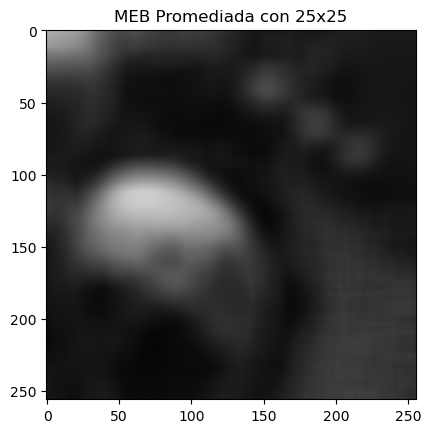

In [94]:
meb_avg_25 = mean(meb, footprint_rectangle((25,25)))

# Visualización de MEB Promediada con 25x25
plt.imshow(meb_avg_25, cmap='gray', vmin=0, vmax=255)
plt.title('MEB Promediada con 25x25')
plt.show()

**¿qué objetos de la imagen original se conservaron?**

De la imagen original quedan a la vista (de forma no muy buena igualmente) la esfera principal, acomodada en la parte inferior izquierda de la imageny la esfera que esta justo encima de esta. El resto de la imagen ya queda muy borrosa por lo que los objetos presentes no se distiguen.

**¿qué sucedió con las estructuras pequeñas presentes en la imagen original?¿por qué?**

Las estructuras pequeñas de la imagen original prácticamente desaparecen o quedan fuertemente borrosas al aplicar el filtro promedio 25×25. Esto ocurre porque el tamaño de la máscara es muy grande en comparación con el tamaño de esos detalles finos. Al promediar sobre una vecindad tan amplia, las variaciones locales de intensidad se diluyen dentro del promedio general, perdiendo contraste y definición.


## **Comparación entre el filtro promedio y el filtro gaussiano**

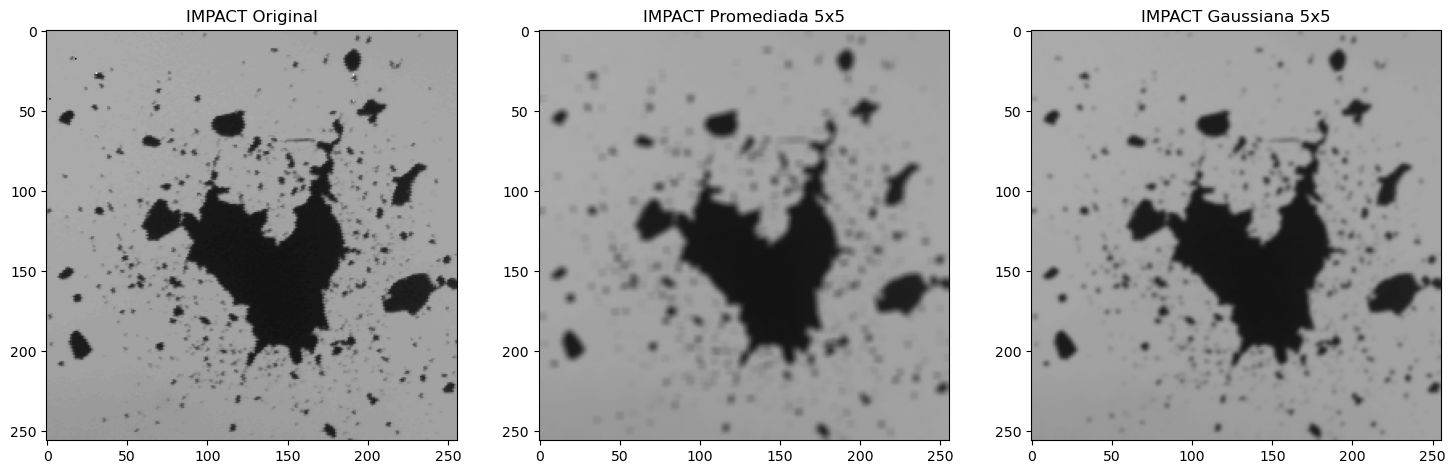

In [95]:
impact = cv2.imread("images/IMPACT.png", cv2.IMREAD_GRAYSCALE)

# Promedio con 5x5
impact_prom = mean(impact, footprint_rectangle((5,5)))

# Gaussiano con mascara de 5x5
impact_gauss = cv2.GaussianBlur(impact, (5,5), 0)

# Visualización de los resultados
fig, ax = plt.subplots(1,3, figsize=(18, 6))
ax[0].imshow(impact, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('IMPACT Original')
ax[1].imshow(impact_prom, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('IMPACT Promediada 5x5')
ax[2].imshow(impact_gauss, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('IMPACT Gaussiana 5x5')
plt.show()

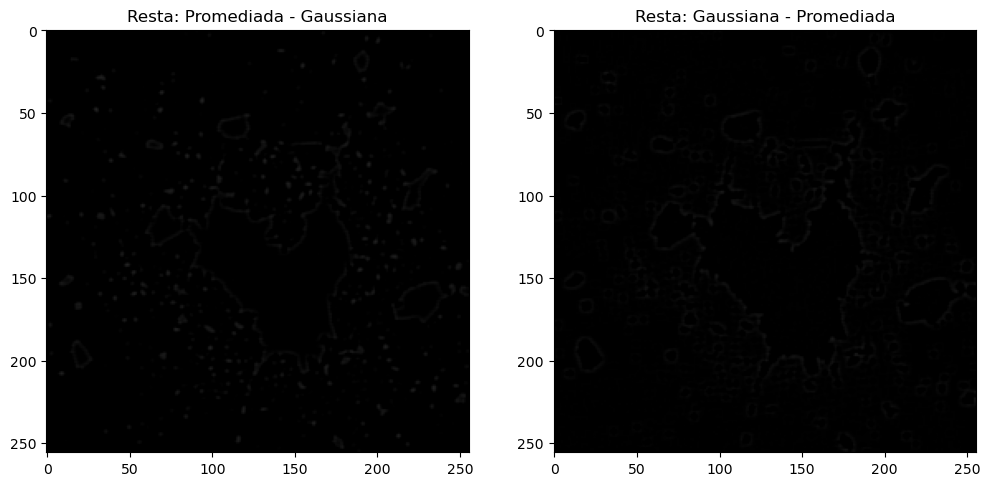

In [96]:
subtraction1 = cv2.subtract(impact_prom, impact_gauss) 
subtraction2 = cv2.subtract(impact_gauss, impact_prom)

# Visualización de las restas
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].imshow(subtraction1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Resta: Promediada - Gaussiana')
ax[1].imshow(subtraction2, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Resta: Gaussiana - Promediada')
plt.show()


**¿en cuáles regiones de la imagen son visibles las diferencias?, ¿por qué?**

Las diferencias se hacen visibles principalmente en las regiones donde existen bordes, detalles finos y cambios bruscos de intensidad. En las zonas homogéneas casi no se aprecia diferencia, ya que ambos filtros producen valores muy similares al promediar áreas uniformes. En cambio, en los contornos y estructuras pequeñas se observa mayor contraste en la imagen de diferencia porque el filtro promedio suaviza de manera uniforme toda la vecindad, mientras que el filtro gaussiano asigna mayor peso al centro y conserva mejor las transiciones.

**¿En qué casos (características de las imágenes) preferiría utilizar un filtro promedio a un filtro gaussiano y visceversa?**

Ambos filtros generan un efecto de suavizado muy similar; sin embargo, la elección depende del objetivo del procesamiento. El filtro promedio puede emplearse cuando se busca un suavizado uniforme y sencillo, por ejemplo, para atenuar variaciones pequeñas sin requerir un tratamiento especial de los bordes. El filtro gaussiano es más adecuado cuando se desea reducir ruido manteniendo mejor la forma de las estructuras principales, especialmente si la imagen será utilizada posteriormente para detección de bordes, segmentación u otros análisis donde los contornos sean relevantes.


## **Filtros lineales separables**

Tiempo de convolución 1: 0.0711 segundos
Tiempo de convolución 2: 0.0652 segundos
Tiempo de convolución 3: 0.0650 segundos
Tiempo de convolución 4: 0.0658 segundos
Tiempo de convolución 5: 0.0745 segundos
Tiempo de convolución 6: 0.0655 segundos
Tiempo de convolución 7: 0.0643 segundos
Tiempo de convolución 8: 0.0657 segundos
Tiempo de convolución 9: 0.0657 segundos
Tiempo de convolución 10: 0.0670 segundos
Tiempo promedio de convolución: 0.0670 segundos


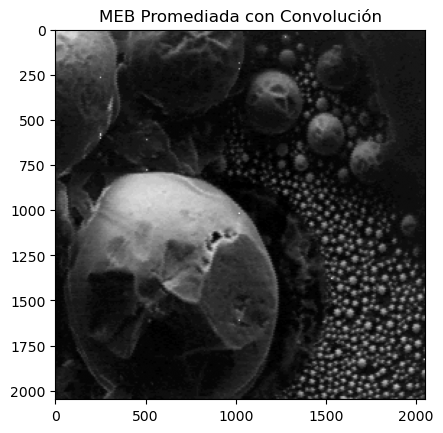

In [97]:
meb = cv2.imread("images/MEB.png", cv2.IMREAD_GRAYSCALE)
meb_r =  cv2.resize(meb, (2048,2048), interpolation=cv2.INTER_NEAREST)

kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])
tiempos1 = []
for i in range(10):
    start = time.time()
    res1 = convolve(meb_r, kernel, mode='constant', cval=0)
    end = time.time()
    tiempos1.append(end - start)
    print(f"Tiempo de convolución {i+1}: {tiempos1[-1]:.4f} segundos")
print(f"Tiempo promedio de convolución: {np.mean(tiempos1):.4f} segundos")

plt.imshow(res1, cmap='gray', vmin=0, vmax=255)
plt.title('MEB Promediada con Convolución')
plt.show()

Tiempo de convolución 1: 0.0443 segundos
Tiempo de convolución 2: 0.0650 segundos
Tiempo de convolución 3: 0.0539 segundos
Tiempo de convolución 4: 0.0394 segundos
Tiempo de convolución 5: 0.0574 segundos
Tiempo de convolución 6: 0.0576 segundos
Tiempo de convolución 7: 0.0483 segundos
Tiempo de convolución 8: 0.0459 segundos
Tiempo de convolución 9: 0.0444 segundos
Tiempo de convolución 10: 0.0451 segundos
Tiempo promedio de la convolución: 0.050135 segundos


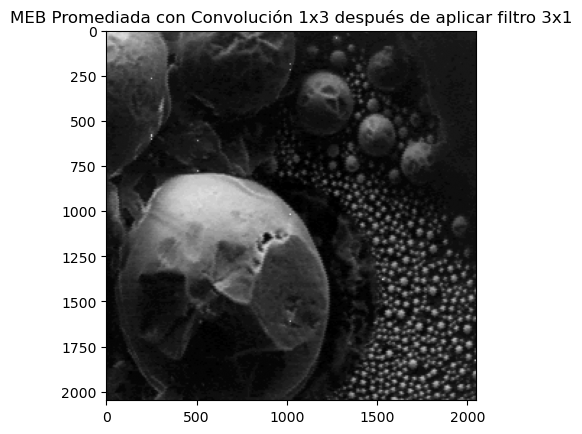

In [98]:
meb_intermedia = mean(meb_r, footprint_rectangle((3, 1)))

kernel_1x3 = np.array([[1/3, 1/3, 1/3]])

tiempos2 = []

for i in range(10):
    start = time.time()
    res2 = convolve(meb_intermedia, kernel_1x3, mode='constant', cval=0)
    end = time.time()
    tiempos2.append(end - start)
    print(f"Tiempo de convolución {i+1}: {tiempos2[-1]:.4f} segundos")

print(f"Tiempo promedio de la convolución: {np.mean(tiempos2):.6f} segundos")
plt.imshow(res2, cmap='gray', vmin=0, vmax=255)
plt.title('MEB Promediada con Convolución 1x3 después de aplicar filtro 3x1')
plt.show()

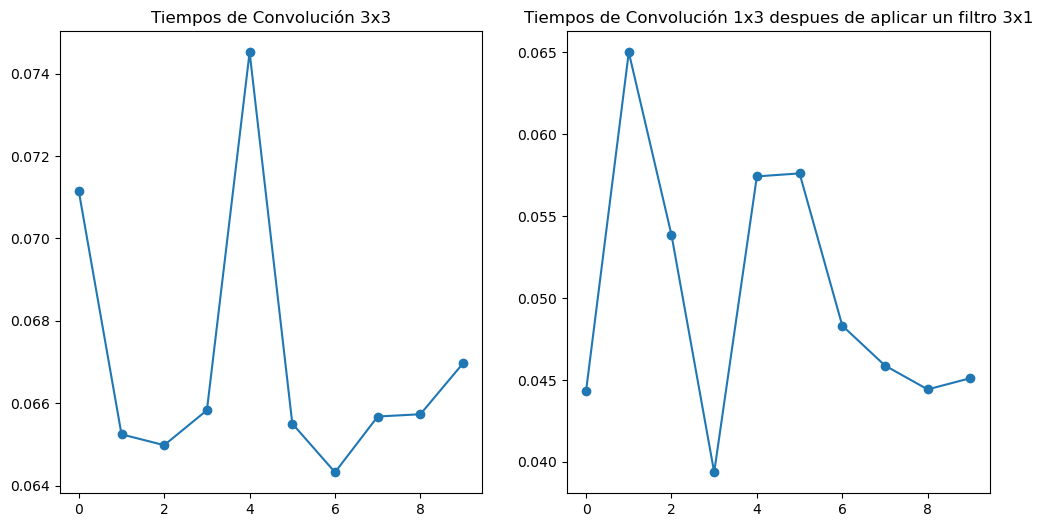

In [99]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].plot(tiempos1, marker='o', linestyle='-')
ax[0].set_title('Tiempos de Convolución 3x3')
ax[1].plot(tiempos2, marker='o', linestyle='-')
ax[1].set_title('Tiempos de Convolución 1x3 despues de aplicar un filtro 3x1')
plt.show()

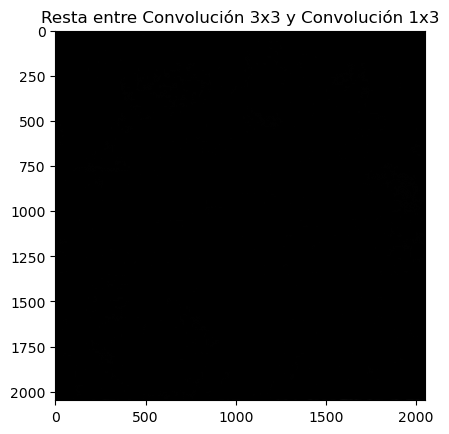

In [100]:
sustraccion = cv2.subtract(res2, res1)

plt.imshow(sustraccion, cmap='gray', vmin=0, vmax=255)
plt.title('Resta entre Convolución 3x3 y Convolución 1x3')
plt.show()

**Las dos imágenes resultantes, ¿son idénticas?**

Si, al hacer la sustracción nos damos cuenta de que ambas imagenes son identicas, esto debido a que la imagen resultante de la sustraccion es completamente negra, por lo que podemos decir que todos los pixeles de ambas imagenes son los mismos.

**Explique la diferencia de los tiempos de ejecución determinando el número de operaciones elementales (SUMA, RESTA) efectuadas por las dos versiones del filtro.**

La diferencia de tiempos se debe al número de operaciones por píxel, con un filtro bidimensional de tamaño k×k aplicado directo, se combinan k² valores en cada píxel, lo que implica del orden de k² operaciones. En cambio, si el filtro es separable, se aplica como dos convoluciones 1D k×1 y 1×k, haciendo primero k valores en una dirección y luego k en la otra, o sea un costo del orden de k+k=2k operaciones por píxel. Por eso el separable es más rápido, pasa de un costo cuadrático O(k²) a uno lineal O(k) en el tamaño del kernel.

**Duración de ejecución para un filtro promedio 10 veces mayor, es decir 30x30**

Teóricamente, si se utilizara una convolución bidimensional estándar, el tiempo de ejecución debería aumentar de forma cuadrática k² respecto al tamaño del kernel; al pasar de un filtro de 3×3 (9 elementos) a uno de 30×30 (900 elementos), el costo computacional sería aproximadamente 100 veces mayor. Sin embargo, al emplear un filtro promedio separable, el cálculo se descompone en dos pasadas lineales, reduciendo la complejidad a O(k). Bajo este esquema, se esperaría que el tiempo de ejecución sea solo 10 veces superior al original.

### **Aplicación estandar**

In [101]:
tam_grande = 30
kernel_30x30 = footprint_rectangle((tam_grande, tam_grande)) / (tam_grande * tam_grande)
tiempos_30x30 = []

for i in range(10):
    start = time.time()
    res_30x30 = convolve(meb_r, kernel_30x30, mode='constant', cval=0)
    end = time.time()
    tiempos_30x30.append(end - start)

print(f"Tiempo promedio (30x30): {np.mean(tiempos_30x30):.6f} s")

Tiempo promedio (30x30): 6.256224 s


### **Aplicación separable**

In [102]:
# Definir nuevo tamaño 10 veces más grande
tam_grande = 30
kernel_30x1 = footprint_rectangle((tam_grande, 1)) / tam_grande
kernel_1x30 = footprint_rectangle((1, tam_grande)) / tam_grande

tiempos_30x30 = []

for i in range(10):
    start = time.time()
    
    # Aplicación separable
    intermedio = convolve(meb_r, kernel_30x1, mode='constant')
    res_30x30 = convolve(intermedio, kernel_1x30, mode='constant')
    
    end = time.time()
    tiempos_30x30.append(end - start)

print(f"Tiempo promedio (30x30): {np.mean(tiempos_30x30):.6f} s")

Tiempo promedio (30x30): 0.708508 s


Los tiempos obtenidos demuestran la enorme diferencia en la eficiencia computacional entre los distintos métodos de filtrado. Al pasar de un filtro de 3x3 a uno de 30x30 de forma estándar, el tiempo de ejecución aumentó drásticamente de 0.042 s a 6.062 s, lo que representa un incremento de más de 100 veces. Este comportamiento es consistente con la complejidad O(k²), donde el número de operaciones por píxel crece de forma cuadrática respecto al tamaño del kernel. En contraste, al aplicar el filtro de 30x30 mediante la técnica separable 30x30, el tiempo se redujo a 0.740 s, siendo al menos 10 veces más rápido que la versión estándar.

# **Filtros no lineales**


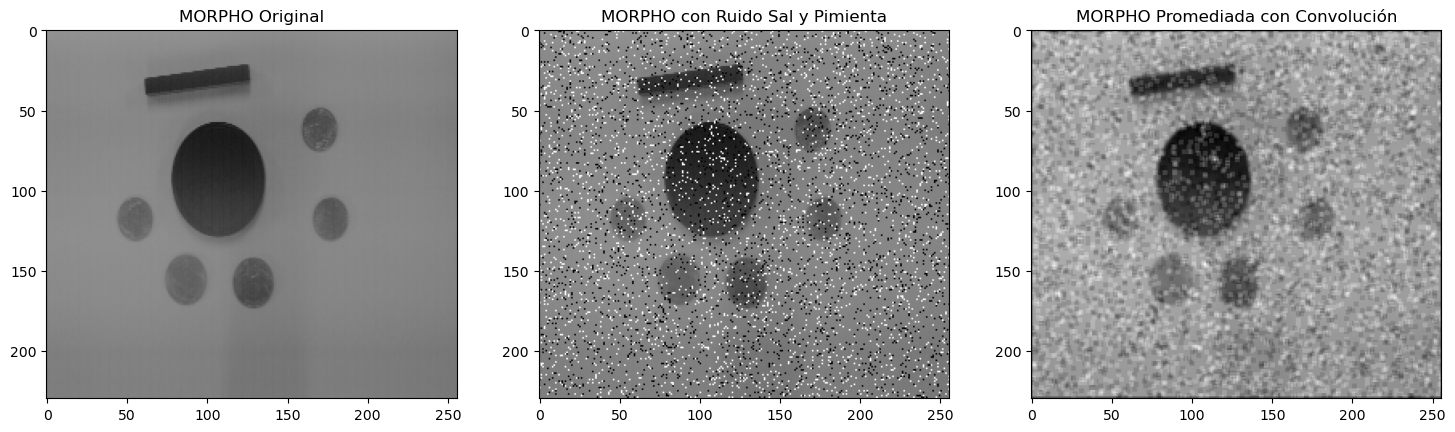

In [103]:
morpho = cv2.imread("images/MORPHO.png", cv2.IMREAD_GRAYSCALE)
# Aplicacion de ruido sal y pimienta
noised_morpho = random_noise(morpho, mode='s&p', amount=0.1)
# filtro promedio 3x3
res = convolve(noised_morpho, kernel, mode='constant', cval=0)

# Visualización del resultado
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(morpho, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('MORPHO Original')
ax[1].imshow(noised_morpho, cmap='gray')
ax[1].set_title('MORPHO con Ruido Sal y Pimienta')
ax[2].imshow(res, cmap='gray')
ax[2].set_title('MORPHO Promediada con Convolución')
plt.show()

**Visualmente, ¿cómo es el resultado y a qué se debe?**

Al aplicar el filtro promedio sobre el ruido "sal y pimienta", los valores extremos (píxeles negros y blancos) no se eliminan, sino que se integran matemáticamente en la estructura de la imagen a través de la convolución. Al promediar cada píxel con su vecindad, los puntos de ruido que antes eran independientes y definidos se diluyen y se "esparcen" por el entorno, convirtiéndose en manchas grisáceas que ahora forman parte de la información visual del fondo. Este proceso de suavizado transforma el ruido de alta frecuencia en variaciones de baja frecuencia inmersas en la señal original, lo que explica por qué la imagen resultante luce menos granular pero notablemente más turbia y con una pérdida evidente de nitidez en los bordes de los objetos.

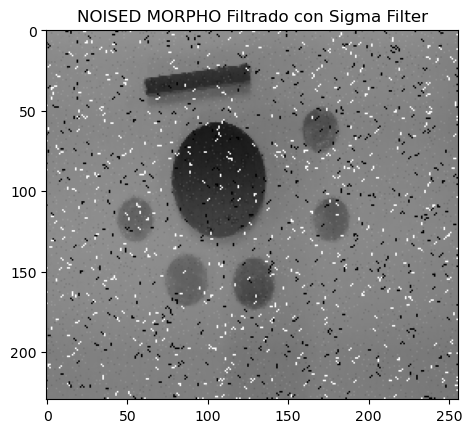

In [107]:

def sigma_filter_medianFalse(values, median=False):
    
    mean = values[int((values.size)//2)]
    if median:
      mean = np.median(values)

    std = np.std(values)
    filtered_values = values[(values > mean - std) & (values < mean + std)]
    return np.mean(values) if filtered_values.size<=1 else np.mean(filtered_values)


filtered_morpho = generic_filter(noised_morpho, sigma_filter_medianFalse, size=(3,3))

# Visualizacion
plt.imshow(filtered_morpho, cmap='gray')
plt.title('NOISED MORPHO Filtrado con Sigma Filter')
plt.show()

**¿cómo es el resultado comparado con el filtro promedio lineal?**

Comparado con el filtro promedio lineal, el filtro Sigma deja una imagen más limpia y con menos desenfoque. El promedio simplemente calcula la media de todos los píxeles dentro de la ventana, incluyendo los puntos blancos y negros del ruido sal y pimienta, por eso el ruido se difumina pero no desaparece del todo y además se pierden detalles. En cambio, el filtro Sigma solo tiene en cuenta los píxeles que son parecidos al píxel central y descarta los que son muy distintos, por eso los puntos extremos del ruido influyen mucho menos en el resultado y los bordes se conservan mejor.

**Consultando la definición del Sigma explique este resultado.**

Según la definición del Sigma, este valor funciona como un límite que decide qué tan diferente puede ser un píxel respecto al central para participar en el promedio. Si un píxel es demasiado distinto (muy oscuro o muy claro), no se incluye en el cálculo. Como el ruido sal y pimienta suele tener valores muy alejados del entorno, muchos de esos puntos quedan fuera del promedio y la imagen se ve más uniforme.

**En el caso del ruido “sal y pimienta”, después de aplicar el filtro Sigma, quedan varios sólo algunos aberrantes. ¿A qué se debe esto? ¿Por qué hay una diferencia significativa con el resultado anterior?**

Quedan solo algunos píxeles aberrantes porque el filtro Sigma no “borra” el ruido por completo: solo descarta (no promedia) los valores que se salen demasiado del rango permitido alrededor del píxel central. Si un punto de sal o pimienta cae en una zona donde el píxel central también está afectado, o si hay varios píxeles ruidosos juntos, esos valores pueden no verse tan “diferentes” dentro de esa ventana y entonces no se eliminan. También puede pasar que, según el sigma elegido, algunos impulsos no queden suficientemente lejos del resto como para ser descartados.

La diferencia significativa con el resultado anterior (filtro promedio lineal) es que el promedio mete todo en la cuenta siempre, incluyendo esos valores extremos, y por eso el ruido se esparce y además se difuminan bordes y detalles. En cambio, el Sigma intenta promediar solo con vecinos parecidos y “ignora” los extremos, así que el ruido impulsivo afecta mucho menos y la imagen se ve más limpia.

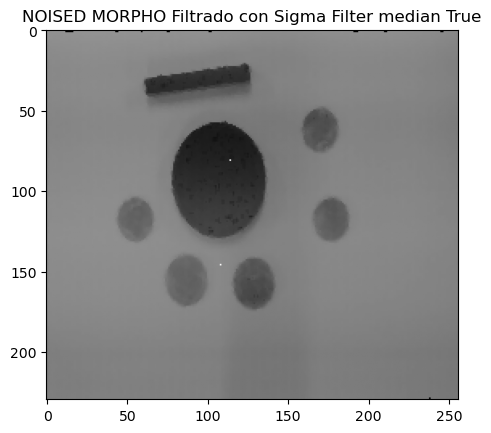

In [108]:

def sigma_filter_medianTrue(values, median=True):
    
    mean = values[int((values.size)//2)]
    if median:
      mean = np.median(values)

    std = np.std(values)
    filtered_values = values[(values > mean - std) & (values < mean + std)]
    return np.mean(values) if filtered_values.size<=1 else np.mean(filtered_values)


filtered_morpho = generic_filter(noised_morpho, sigma_filter_medianTrue, size=(3,3))

# Visualizacion
plt.imshow(filtered_morpho, cmap='gray')
plt.title('NOISED MORPHO Filtrado con Sigma Filter median True')
plt.show()

**¿cómo es el resultado comparado con el filtro promedio lineal?**

Visualmente, el resultado es claramente mejor que con el filtro promedio lineal: la imagen se ve más limpia, el ruido de sal y pimienta se reduce de forma más efectiva y los bordes y formas se conservan mejor. El promedio lineal suaviza toda la imagen porque mezcla todos los valores del vecindario, incluidos los píxeles extremos del ruido, lo que provoca desenfoque general. En cambio, con el filtro Sigma usando la mediana como valor central, el resultado es más estable frente a valores atípicos y por eso mantiene mejor la estructura original.

**Consultando la definición del Sigma explique este resultado. En el caso del ruido “sal y pimienta”, después de aplicar el filtro Sigma, quedan varios sólo algunos aberrantes. ¿A qué se debe esto? ¿Por qué hay una diferencia significativa con el resultado anterior?**

Según la definición del filtro Sigma, el valor filtrado en cada píxel se calcula promediando solo los vecinos “parecidos” al valor central, es decir, aquellos cuya intensidad cae dentro de un intervalo alrededor de ese valor central. Con ruido “sal y pimienta”, los píxeles corruptos suelen ser valores extremos, así que normalmente quedan fuera de ese intervalo y se excluyen del promedio, por eso el resultado se ve más limpio y con menos desenfoque que el filtro promedio lineal, que siempre mezcla todos los valores y termina esparciendo esos extremos. Que aun así queden algunos píxeles aberrantes se debe a que en ciertas ventanas 3×3 el centro también puede estar contaminado, y entonces la mediana y la desviación estándar cambian de manera que el umbral se vuelve menos efectivo, el valor ruidoso puede no quedar tan lejano respecto a lo que el vecindario está mostrando en ese momento, y no se descarta. Esa es la razón de la diferencia marcada con el promedio, Sigma aplica una selección que intenta ignorar outliers el promedio no selecciona, los incluye y los difunde.


C:\Users\santi\AppData\Local\Temp\ipykernel_39812\3061422022.py:11: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered_morpho_rank = median_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))


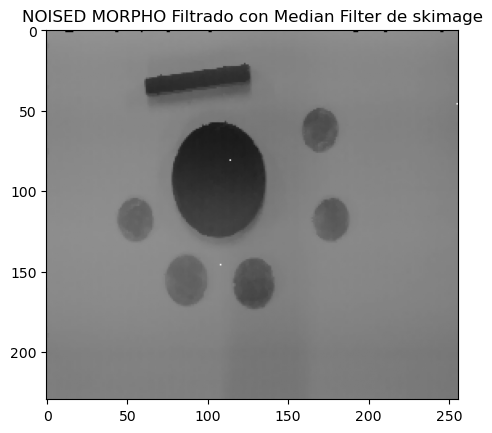

In [126]:

def median_filter_rank(image, footprint=None, out=None, mask=None,
                       shift_x=0, shift_y=0, shift_z=0):
    return median(image,
                  footprint=footprint,
                  out=out,
                  mask=mask,
                  shift_x=shift_x,
                  shift_y=shift_y,
                  shift_z=shift_z)
    
filtered_morpho_rank = median_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))

# Visualizacion
plt.imshow(filtered_morpho_rank, cmap='gray')
plt.title('NOISED MORPHO Filtrado con Median Filter de skimage')
plt.show()

**cómo es el resultado comparado con los dos filtros anteriores?**

Comparado con los dos filtros anteriores, el filtro de mediana puro produce un resultado igual o incluso ligeramente mejor en la eliminación del ruido sal y pimienta, la imagen queda más limpia y con mejor preservación de bordes, sin el efecto de desenfoque que introduce el promedio lineal. Frente al Sigma, el resultado es muy parecido porque ambos métodos son robustos ante valores extremos cuando se usa una ventana pequeña.

**¿A qué se debe este resultado?**

Este resultado se debe a la naturaleza del ruido sal y pimienta, que introduce valores muy altos o muy bajos aislados. El filtro promedio los incorpora al cálculo y los difunde, generando suavizado global. En cambio, tanto el Sigma como la mediana son poco sensibles a esos extremos. En particular, la mediana es especialmente eficaz contra ruido impulsivo porque no depende del valor numérico de los extremos sino de su posición en el ordenamiento, por eso elimina casi por completo este tipo de ruido y conserva mejor la estructura de la imagen.

C:\Users\santi\AppData\Local\Temp\ipykernel_39812\1845464688.py:11: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered_morpho_maximum = maximum_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))


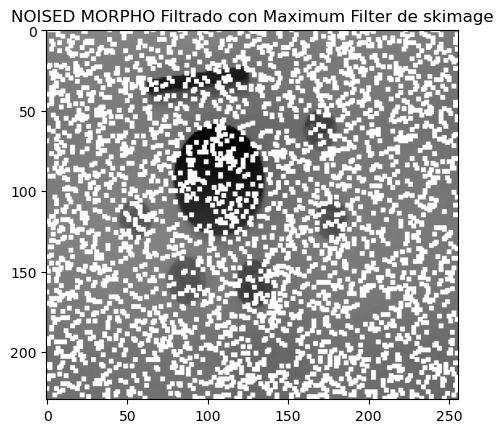

In [127]:
def maximum_filter_rank(image, footprint, out=None, mask=None,
                        shift_x=0, shift_y=0, shift_z=0):
    return maximum(image,
                   footprint=footprint,
                   out=out,
                   mask=mask,
                   shift_x=shift_x,
                   shift_y=shift_y,
                   shift_z=shift_z)
    
filtered_morpho_maximum = maximum_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))
# Visualizacion
plt.imshow(filtered_morpho_maximum, cmap='gray')
plt.title('NOISED MORPHO Filtrado con Maximum Filter de skimage')
plt.show()

maximum: Reemplaza cada píxel por el valor más alto dentro del vecindario. Aclara la imagen, expande regiones brillantes y tiende a rellenar huecos oscuros pequeños. Este engrosa objetos claros y puede comerse detalles finos oscuros.

C:\Users\santi\AppData\Local\Temp\ipykernel_39812\4126719764.py:11: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered_morpho_minimum = minimum_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))


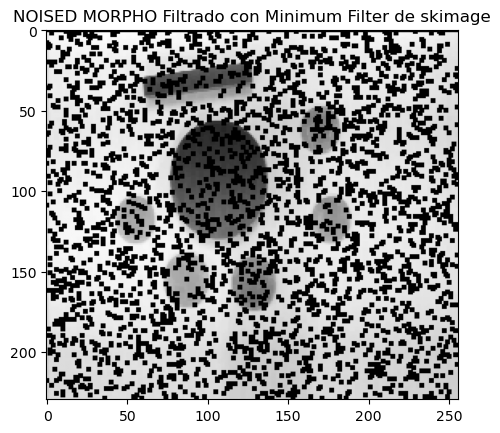

In [128]:
def minimum_filter_rank(image, footprint, out=None, mask=None,
                        shift_x=0, shift_y=0, shift_z=0):
    return minimum(image,
                   footprint=footprint,
                   out=out,
                   mask=mask,
                   shift_x=shift_x,
                   shift_y=shift_y,
                   shift_z=shift_z)

filtered_morpho_minimum = minimum_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))
# Visualizacion
plt.imshow(filtered_morpho_minimum, cmap='gray')
plt.title('NOISED MORPHO Filtrado con Minimum Filter de skimage')
plt.show()

minimum: Reemplaza cada píxel por el valor más bajo del vecindario. Oscurece la imagen, expande regiones oscuras y elimina punticos brillantes pequeños. Este adelgaza objetos claros, agranda sombras/regiones oscuras y puede romper estructuras delgadas claras.

C:\Users\santi\AppData\Local\Temp\ipykernel_39812\3109840552.py:10: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered_morpho_majority = majority_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))


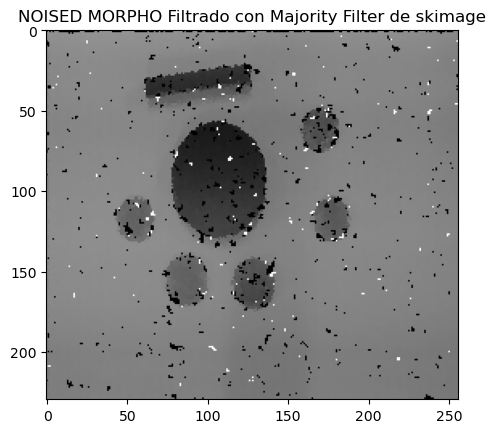

In [129]:
def majority_filter_rank(image, footprint, out=None, mask=None,
                         shift_x=0, shift_y=0, shift_z=0):
    return majority(image,
                    footprint=footprint,
                    out=out,
                    mask=mask,
                    shift_x=shift_x,
                    shift_y=shift_y)
    
filtered_morpho_majority = majority_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))

# Visualizacion
plt.imshow(filtered_morpho_majority, cmap='gray')
plt.title('NOISED MORPHO Filtrado con Majority Filter de skimage')
plt.show()

majority: Asigna al píxel el valor que más se repite en el vecindario. En imágenes cuantizadas o binarias funciona como un voto, corrige píxeles aislados que difieren del entorno y suaviza pequeñas inconsistencias sin promediar intensidades. Si hay muchos niveles de gris distintos, puede volverse inestable porque no hay un valor que domine claramente.

C:\Users\santi\AppData\Local\Temp\ipykernel_39812\3691122620.py:11: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered_morpho_modal = modal_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))


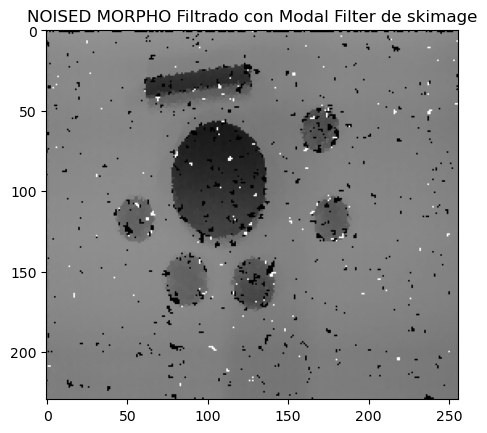

In [130]:
def modal_filter_rank(image, footprint, out=None, mask=None,
                      shift_x=0, shift_y=0, shift_z=0):
    return modal(image,
                 footprint=footprint,
                 out=out,
                 mask=mask,
                 shift_x=shift_x,
                 shift_y=shift_y,
                 shift_z=shift_z)
    
filtered_morpho_modal = modal_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))

# Visualizacion
plt.imshow(filtered_morpho_modal, cmap='gray')
plt.title('NOISED MORPHO Filtrado con Modal Filter de skimage')
plt.show()


modal: Devuelve el valor más frecuente del histograma local, conceptualmente es lo mismo que “majority” pero expresado como “la moda” del vecindario. Tiende a reforzar el nivel de gris dominante localmente y eliminar valores raros/aislados, preservando mejor bordes que un promedio, pero puede generar “parches” si la textura tiene varios niveles frecuentes.

C:\Users\santi\AppData\Local\Temp\ipykernel_39812\3994044004.py:11: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered_morpho_geometric = geometric_mean_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))


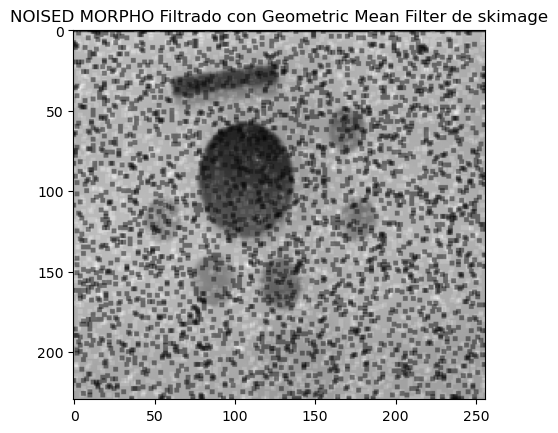

In [131]:
def geometric_mean_filter_rank(image, footprint, out=None, mask=None,
                                shift_x=0, shift_y=0, shift_z=0):
    return geometric_mean(image,
                          footprint=footprint,
                          out=out,
                          mask=mask,
                          shift_x=shift_x,
                          shift_y=shift_y,
                          shift_z=shift_z)
    
filtered_morpho_geometric = geometric_mean_filter_rank(noised_morpho, footprint=footprint_rectangle((3,3)))

# Visualizacion
plt.imshow(filtered_morpho_geometric, cmap='gray')
plt.title('NOISED MORPHO Filtrado con Geometric Mean Filter de skimage')
plt.show()

geometric_mean: Combina los valores del vecindario multiplicándolos. Suaviza, pero penaliza fuerte los valores bajos, un solo 0 en la ventana empuja el resultado hacia 0, así que con ruido “pimienta” puede oscurecer más de la cuenta. Es menos sensible a valores altos aislados que la media aritmética, pero es delicada con ceros y con valores muy pequeños.

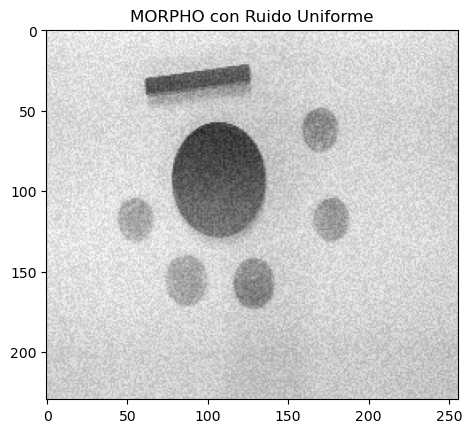

In [132]:
noise = np.random.uniform(low=0, high=30, size=morpho.shape)
noisy_morpho = morpho + noise

# Visualización del resultado
plt.imshow(noisy_morpho, cmap='gray')
plt.title('MORPHO con Ruido Uniforme')
plt.show()


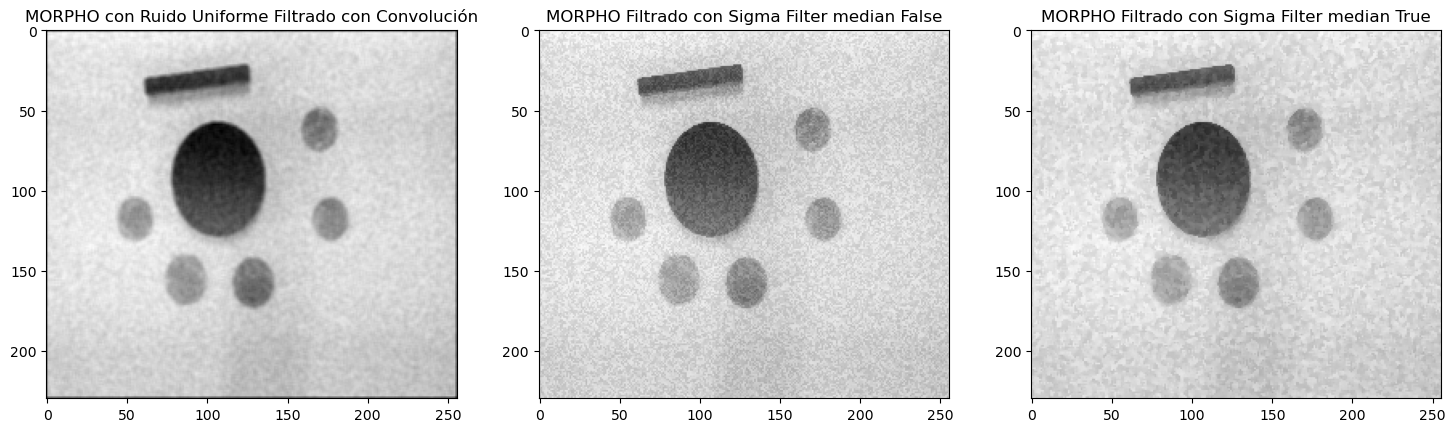

In [121]:
res1 = convolve(noisy_morpho, kernel, mode='constant', cval=0)
res2 = generic_filter(noisy_morpho, sigma_filter_medianFalse, size=(3,3))
res3 = generic_filter(noisy_morpho, sigma_filter_medianTrue, size=(3,3))

# Visualización de los resultados
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(res1, cmap='gray')
ax[0].set_title('MORPHO con Ruido Uniforme Filtrado con Convolución')
ax[1].imshow(res2, cmap='gray')
ax[1].set_title('MORPHO Filtrado con Sigma Filter median False')
ax[2].imshow(res3, cmap='gray')
ax[2].set_title('MORPHO Filtrado con Sigma Filter median True')
plt.show()

En la primera imagen se observa un suavizado más homogéneo, el ruido uniforme disminuye, pero a costa de un mayor desenfoque en bordes y detalles, especialmente en el contorno del círculo central y las figuras pequeñas. El promedio lineal reduce la variación porque combina todos los valores del vecindario, pero no distingue entre señal y ruido, por lo que también atenúa transiciones y pierde nitidez.

En los resultados con filtro Sigma, tanto con median=False como con median=True, el ruido se reduce de forma similar pero los bordes se conservan ligeramente mejor que con el promedio. La diferencia entre usar el valor central o la mediana como referencia es sutil en este caso, porque el ruido es uniforme y no contiene valores extremos claros que puedan excluirse fácilmente. Como la mayoría de los píxeles caen dentro del rango ±σ, el Sigma actúa casi como un suavizado selectivo leve, por eso las tres imágenes son parecidas, aunque el promedio tiende a verse un poco más borroso.

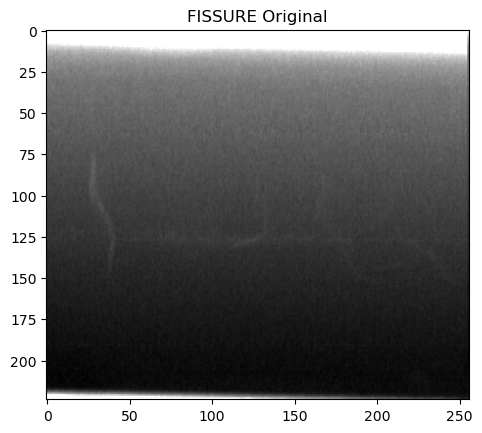

In [122]:
fissure = cv2.imread("images/FISSURE.png", cv2.IMREAD_GRAYSCALE)

# Visualización del resultado
plt.imshow(fissure, cmap='gray')
plt.title('FISSURE Original')
plt.show()

In [136]:
fissure_noised = random_noise(fissure, mode='s&p', amount=0.1)
fissure_medianTrue = generic_filter(fissure_noised, sigma_filter_medianTrue, size=(3,3))
fissure_max = maximum_filter_rank(fissure_noised, footprint=footprint_rectangle((3,3)))
fissure_min = minimum_filter_rank(fissure_noised, footprint=footprint_rectangle((3,3)))
fissure_majority = majority_filter_rank(fissure_noised, footprint=footprint_rectangle((3,3)))
fissure_modal = modal_filter_rank(fissure_noised, footprint=footprint_rectangle((3,3)))
fissure_geometric = geometric_mean_filter_rank(fissure_noised, footprint=footprint_rectangle((3,3)))



C:\Users\santi\AppData\Local\Temp\ipykernel_39812\11609213.py:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  fissure_max = maximum_filter_rank(fissure_noised, footprint=footprint_rectangle((3,3)))
C:\Users\santi\AppData\Local\Temp\ipykernel_39812\11609213.py:4: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  fissure_min = minimum_filter_rank(fissure_noised, footprint=footprint_rectangle((3,3)))
C:\Users\santi\AppData\Local\Temp\ipykernel_39812\11609213.py:5: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  fissure_majority = majority_filter_rank(fissure_noised, footprint=footprint_r

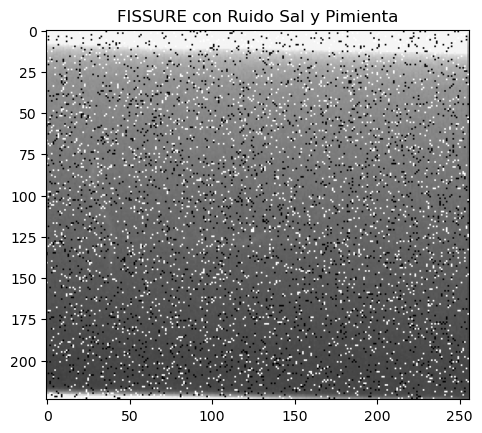

In [137]:
plt.imshow(fissure_noised, cmap='gray')
plt.title('FISSURE con Ruido Sal y Pimienta')
plt.show()

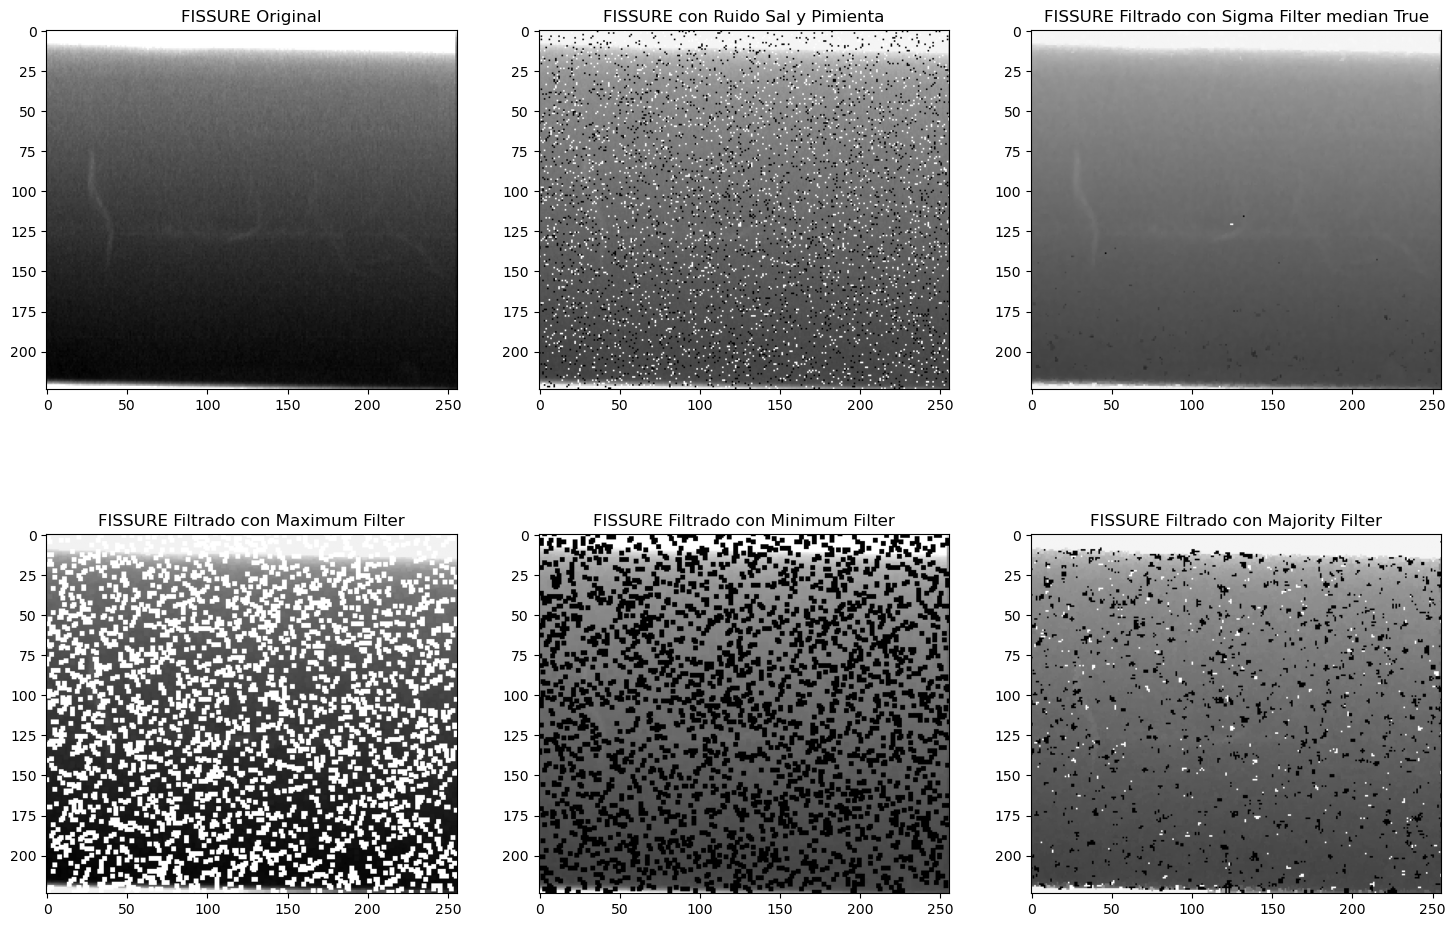

In [141]:
# Visualización de los resultados
fig, ax = plt.subplots(2,3, figsize=(18, 12))
ax[0,0].imshow(fissure, cmap='gray')
ax[0,0].set_title('FISSURE Original')
ax[0,1].imshow(fissure_noised, cmap='gray')
ax[0,1].set_title('FISSURE con Ruido Sal y Pimienta')
ax[0,2].imshow(fissure_medianTrue, cmap='gray')
ax[0,2].set_title('FISSURE Filtrado con Sigma Filter median True')
ax[1,0].imshow(fissure_max, cmap='gray')
ax[1,0].set_title('FISSURE Filtrado con Maximum Filter')
ax[1,1].imshow(fissure_min, cmap='gray')
ax[1,1].set_title('FISSURE Filtrado con Minimum Filter')
ax[1,2].imshow(fissure_majority, cmap='gray')
ax[1,2].set_title('FISSURE Filtrado con Majority Filter')
plt.show()

**Compare los resultados obtenidos. Concluya en qué casos (características de la imagen, tipo de ruido, ...) se usan cada uno de estos filtros.**

Al comparar los resultados se observa que cada filtro responde de manera distinta frente al ruido sal y pimienta. El filtro Sigma (median=True) elimina la mayor parte de los puntos impulsivos y conserva bastante bien las estructuras de la fisura, manteniendo el contraste y los bordes. En cambio, el maximum y el minimum no eliminan el ruido, sino que lo transforman, el máximo expande los puntos blancos la sal, generando regiones claras más grandes, mientras que el mínimo expande los puntos negros la pimienta, oscureciendo más la imagen. El majority reduce parte del ruido cuando este es minoritario dentro de la ventana, pero no es tan eficaz como la mediana o el Sigma para ruido impulsivo intenso, ya que depende de que exista un valor dominante claro en el vecindario.

En conclusión, para ruido sal y pimienta, los filtros más adecuados son la mediana o el Sigma, porque son robustos frente a outliers y no difunden los extremos. Los filtros maximum y minimum se usan más para resaltar o eliminar estructuras según su intensidad, no como filtros de reducción de ruido general. El filtro majority es útil en imágenes discretas o binarias donde se desea reforzar el valor predominante local. En imágenes con ruido impulsivo fuerte y detalles finos, conviene usar mediana o Sigma; en tareas de segmentación o manipulación estructural, se prefieren máximo y mínimo.